<a href="https://colab.research.google.com/github/mweiher15/CollectiveIntelCapstone/blob/main/Comp440_WikipediaProjectFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processing Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [ ]:
FA_df = pd.read_csv("FA_categories.csv")
FA_df

,page_id,revid,quality,enqual,qual_float,wiki_db,article_title,average_views,categories
0,662,1148135906,FA,FA,1.0,enwiki,Apollo 11,6743.0,"['Military History', 'Spaceflight', 'Solar Sys..."
1,663,1147085548,FA,FA,1.0,enwiki,Apollo 8,1076.0,"['Spaceflight', 'Solar System']"
2,798,1146992616,FA,FA,1.0,enwiki,Aries (constellation),498.0,[]
3,874,1146522519,FA,FA,1.0,enwiki,Ancient Egypt,5008.0,"['Ancient Egypt', 'Egypt', 'Africa', 'Archaeol..."
4,901,1147195027,FA,FA,1.0,enwiki,Astatine,822.0,['Elements']
...,...,...,...,...,...,...,...,...,...
1239,71385873,1146784902,FA,FA,1.0,enwiki,John Raymond science fiction magazines,199.0,"['banner shell', 'Science Fiction', 'United St..."
1240,71651693,1148141647,FA,FA,1.0,enwiki,Hajj: Journey to the Heart of Islam,66.0,"['Visual Art', 'Islam', 'Museums', 'British Mu..."
1241,72292766,1147270443,FA,FA,1.0,enwiki,Illusion of Kate Moss,188.0,"['banner shell', 'Fashion', 'Theatre', 'Magic']"
1242,73075082,1147581673,FA,FA,1.0,enwiki,Freedom (concert),78.0,"['Tambayan Philippines', 'Concerts', 'Women in..."


In [ ]:
sorted_FA = FA_df.sort_values('average_views', ascending=False)
sorted_FA

,page_id,revid,quality,enqual,qual_float,wiki_db,article_title,average_views,categories
928,12153654,1147242036,FA,FA,1.0,enwiki,Elizabeth II,62523.0,"['Spoken Wikipedia', 'Biography', 'British Roy..."
277,60827,1149175870,FA,FA,1.0,enwiki,Cleopatra,52124.0,"['Biography', 'Military history', 'Rome', 'Anc..."
71,14533,1147231511,FA,FA,1.0,enwiki,India,39567.0,"['India', 'South Asia', 'Asia', 'Countries', '..."
233,47923,1147359707,FA,FA,1.0,enwiki,Queen Victoria,26306.0,"['Biography', 'British Royalty', 'Politics of ..."
117,20455,1147278427,FA,FA,1.0,enwiki,Michael Jordan,25920.0,"['Biography', 'Basketball', 'College Basketbal..."
...,...,...,...,...,...,...,...,...,...
1059,24899644,1147511176,FA,FA,1.0,enwiki,Eric Harrison (RAAF officer),5.0,[]
1178,54190143,1146897199,FA,FA,1.0,enwiki,2010 Twenty20 Cup final,5.0,[]
988,17908134,1150131027,FA,FA,1.0,enwiki,1894–95 New Brompton F.C. season,4.0,['Kent']
1089,29174100,1148594365,FA,FA,1.0,enwiki,Li Rui,3.0,"['Biography', 'China', 'Politics']"


In [ ]:
new_df = sorted_FA[pd.isna(sorted_FA['average_views']) == False]

In [ ]:
new_df

,page_id,revid,quality,enqual,qual_float,wiki_db,article_title,average_views,categories
928,12153654,1147242036,FA,FA,1.0,enwiki,Elizabeth II,62523.0,"['Spoken Wikipedia', 'Biography', 'British Roy..."
277,60827,1149175870,FA,FA,1.0,enwiki,Cleopatra,52124.0,"['Biography', 'Military history', 'Rome', 'Anc..."
71,14533,1147231511,FA,FA,1.0,enwiki,India,39567.0,"['India', 'South Asia', 'Asia', 'Countries', '..."
233,47923,1147359707,FA,FA,1.0,enwiki,Queen Victoria,26306.0,"['Biography', 'British Royalty', 'Politics of ..."
117,20455,1147278427,FA,FA,1.0,enwiki,Michael Jordan,25920.0,"['Biography', 'Basketball', 'College Basketbal..."
...,...,...,...,...,...,...,...,...,...
954,14273067,1150019269,FA,FA,1.0,enwiki,Ernest Roberts (Australian politician),5.0,"['Biography', 'Australia', 'Channel Islands', ..."
1059,24899644,1147511176,FA,FA,1.0,enwiki,Eric Harrison (RAAF officer),5.0,[]
1178,54190143,1146897199,FA,FA,1.0,enwiki,2010 Twenty20 Cup final,5.0,[]
988,17908134,1150131027,FA,FA,1.0,enwiki,1894–95 New Brompton F.C. season,4.0,['Kent']


Cleaned data in the same way that we did for the Stub article set. There was only one entry with NaN as the average page view. We found it interesting that there would be a NaN entry at all for FAs because we'd wouldn't ecxpect any NaN entries for the FA set.

## Looking at View Distribution

  Page View Range  Number of Articles
0       (0, 1000]                 773
1    (1000, 2000]                 161
2    (2000, 3000]                  78
3    (3000, 4000]                  67
4    (4000, 5000]                  34
5    (5000, 6000]                  26
6    (6000, 7000]                  19
7    (8000, 9000]                  13
8    (7000, 8000]                  11


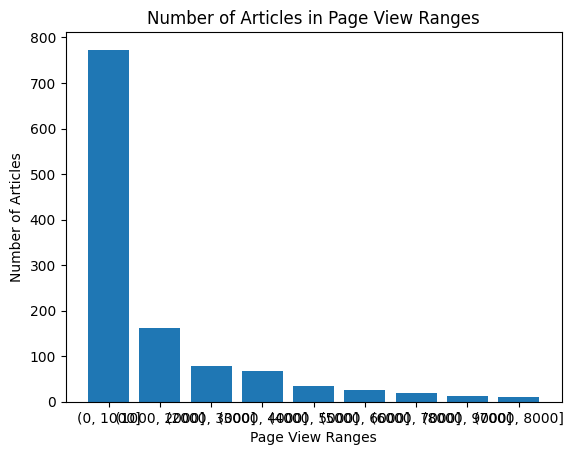

In [ ]:
# create bins for the page view data
bins = range(0, 10000, 1000)

# use cut() to categorize the page views into bins
page_view_bins = pd.cut(new_df['average_views'], bins)

# count the number of articles in each bin
bin_counts = page_view_bins.value_counts()

# create a new DataFrame from the bin_counts Series
table_data = pd.DataFrame({
    'Page View Range': [str(bin) for bin in bin_counts.index],
    'Number of Articles': bin_counts.values
})

# display the table
print(table_data)

#plot the data as a bar chart
plt.bar(x=[str(bin) for bin in bin_counts.index], height=bin_counts.values)
plt.xlabel('Page View Ranges')
plt.ylabel('Number of Articles')
plt.title('Number of Articles in Page View Ranges')
plt.show()

As with Stub articles, we see a downward trend in average page view range.

In [ ]:
cutViews_df = new_df[new_df['average_views'] > 10]

## Looking at Wikiproject Distribution

In [ ]:
cat_counts = cutViews_df['categories'].value_counts().sort_values(ascending=False)
cat_counts

[]                                                                                                    35
['Video games']                                                                                       33
['Dinosaurs', 'Palaeontology']                                                                         8
['Video games', 'Square Enix']                                                                         8
['Weather']                                                                                            7
                                                                                                      ..
['Film', '20th Century Studios']                                                                       1
['Thailand', 'Former countries']                                                                       1
['Biography', 'Brazil', 'Conservatism', 'Former countries', 'International relations', 'Politics']     1
['Cricket', 'Yorkshire', 'Biography']                  

In [ ]:
better_df = cutViews_df[cutViews_df['categories'] != '[]']
counts = better_df['categories'].value_counts().sort_values(ascending=False)
counts

['Video games']                                                                                       33
['Video games', 'Square Enix']                                                                         8
['Dinosaurs', 'Palaeontology']                                                                         8
['Weather']                                                                                            7
['Solar System', 'Astronomy']                                                                          6
                                                                                                      ..
['Film', '20th Century Studios']                                                                       1
['Thailand', 'Former countries']                                                                       1
['Biography', 'Brazil', 'Conservatism', 'Former countries', 'International relations', 'Politics']     1
['Cricket', 'Yorkshire', 'Biography']                  

Here, with FAs, we see that these are different than with stubs. This may not be super helpful to look at because of the low population of FAs. So the above data may have too significant conclusions.

In [ ]:
def parse_category(category_str):
  """This takes a string in 'list' format and returns it as an actual list object"""
  category_list = ast.literal_eval(category_str)
  return category_list

In [ ]:
better_df['categories'] = better_df['categories'].apply(parse_category)

<ipython-input-16-699b90aa8990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  better_df['categories'] = better_df['categories'].apply(parse_category)


In [ ]:
explode_df = better_df.explode('categories')

In [ ]:
cat_counts = explode_df['categories'].value_counts().sort_values(ascending=False)
counts_minus_1 = cat_counts.to_frame(name = "num_articles")
counts_minus_1 = counts_minus_1.drop(index="banner shell")

In [ ]:
#counts_minus_1 = counts_minus_1[counts_minus_1["num_articles"] > 25]
top20 = counts_minus_1.head(20)

<Axes: >

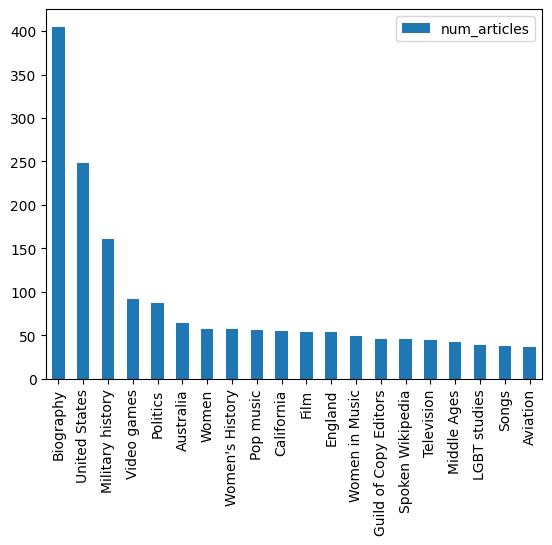

In [ ]:
top20.plot(kind='bar')

Like with stubs, Biography and United States make their way into the top five. The magnitude in difference between Biography and the second place wikiproject is much smaller than in the stubs set. Military history, video games, and politics are here too. Like in the paper we read, military history easily makes its way into the top five wikiprojects because of its large contributor base of old retired dudes who have lots of time and knowledge to contribute to long articles about military history. 

In [ ]:
explode_df_views = explode_df.groupby("categories")["average_views"].sum()
#yesss = pd.DataFrame({'category' : explode_df_views.index,'view_count':explode_df_views.values})

sorted_cats = explode_df_views.to_frame(name="view_count")
sorted_cats = sorted_cats.sort_values(by="view_count",ascending=False)

In [ ]:
explode_df_views = explode_df.groupby("categories")["average_views"].sum()
explode_df_articles = explode_df.groupby("categories").size()
avg_views = explode_df_views / explode_df_articles
sorted_cats = avg_views.to_frame(name="average_views")
sorted_cats = sorted_cats.sort_values(by="average_views", ascending=False)

In [ ]:
top20_views = sorted_cats.head(20)
top20_views

,average_views
categories,
Belize,62523.000000
Grenada,62523.000000
Zimbabwe,62523.000000
Malta,62523.000000
Wiki Loves Women,52124.000000
South Africa,31691.500000
Commonwealth,29593.000000
Asia,29226.500000
NASCAR,25920.000000


With the above adjusted average views, we can see that it's dominated by countries. The top four are tied for first place, isn't that crazy! No military history either. Wacky. 

<Axes: xlabel='categories'>

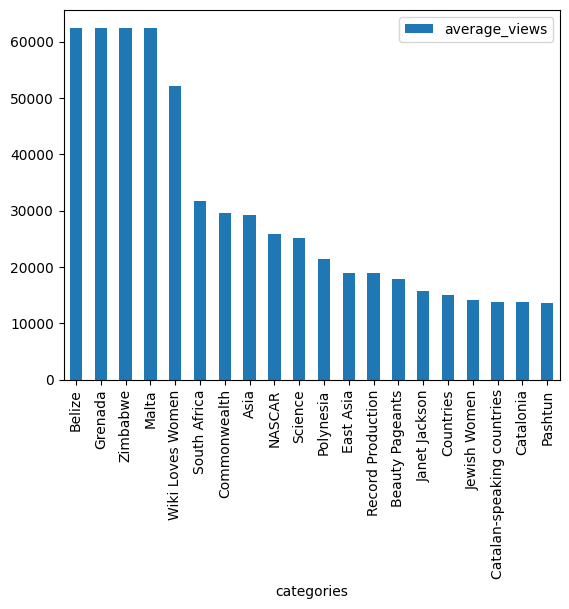

In [ ]:
top20_views.plot(kind='bar')